20


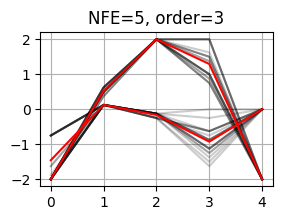

20


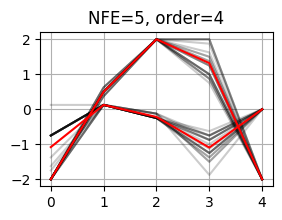

20


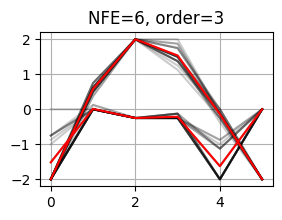

20


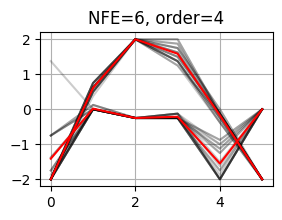

20


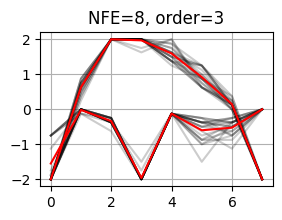

20


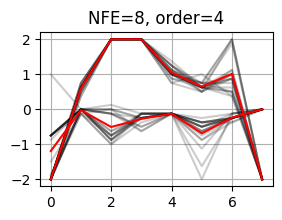

20


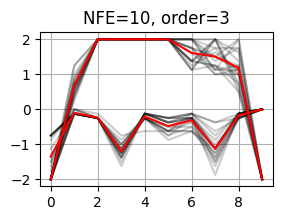

20


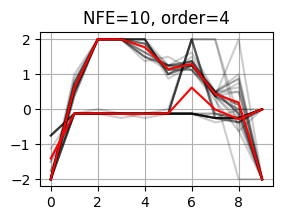

20


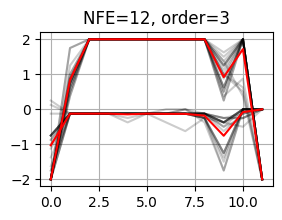

20


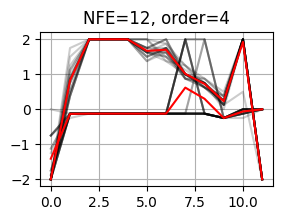

20


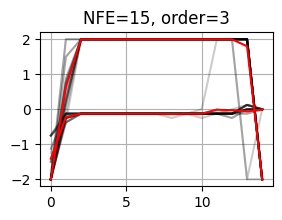

20


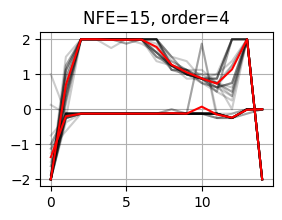

20


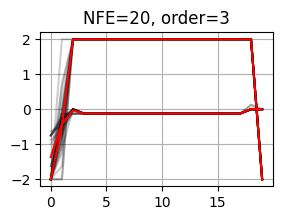

20


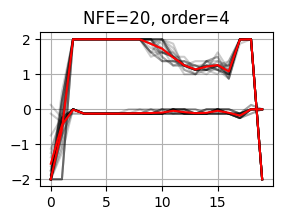

20


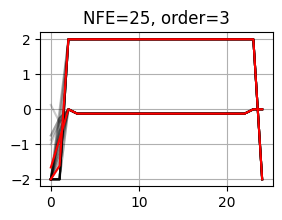

20


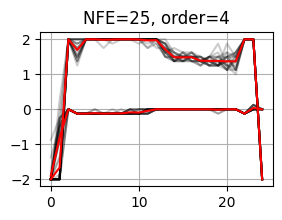

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt

for NFE in [5, 6, 8, 10, 12, 15, 20, 25]:
    for order in [3, 4]:
        root_dir = f'/data/guided-diffusion/scale/rbf_ecp_marginal_64'
        optimal_log_scales_list = []
        plt.figure(figsize=[3, 2])
        plt.title(f"NFE={NFE}, order={order}")
        for number in range(100):
            npz_file = os.path.join(root_dir, f'NFE={NFE},p={order},number={number}.npz')
            if not os.path.exists(npz_file):
                continue
                
            data = np.load(npz_file)
            plt.plot(data['optimal_log_scales'].T, color='black', alpha=0.2)
            optimal_log_scales_list.append(data['optimal_log_scales'])

        optimal_log_scales = np.stack(optimal_log_scales_list, axis=0)
        print(len(optimal_log_scales))
        optimal_log_scales = np.mean(optimal_log_scales, axis=0)
        save_file = os.path.join(root_dir, f'NFE={NFE},p={order}.npz')
        np.savez(save_file, optimal_log_scales=optimal_log_scales)
        data = np.load(save_file)
        plt.plot(data['optimal_log_scales'].T, color='red')
        plt.grid()
        plt.show()
        
